### Load Data

Pertama dilakukan adalah load data dari dataset yang sudah diberikan

In [1]:
import pandas as pd
import numpy as np
seed = 2021

In [2]:
df = pd.read_csv("../data/data.csv")
df

,article_id,article_topic,article_content
0,93205794,Internasional,Kepolisian Inggris tengah memburu pelaku yang...
1,93186698,Ekonomi,Seluruh layanan transaksi di jalan tol akan m...
2,93191463,Teknologi,"\nHari ini, Rabu (23/8), ternyata menjadi har..."
3,93219292,Ekonomi,Saat ini Indonesia hanya memiliki cadangan ba...
4,343106,Hiburan,"Hari ini, Selasa (1/8), pedangdut Ridho Rhoma..."
...,...,...,...
9995,93221319,Bojonegoro,Reporter : Joel JokoblokBojonegoro.com - Har...
9996,93203115,Ekonomi,"Pada akhir tahun ini, Direktur Jenderal (Dirj..."
9997,93230854,Sepak Bola,Ketika pertama kali datang ke Barcelona pada ...
9998,93199312,Sepak Bola,Tim Nasional (Timnas) Indonesia U-19 berhasil...


Dataset terdiri dari 3 kolom yaitu : article_id, article_topic, dan article_content dengan jumlah data sebanyak 10000 data. article_content merupakan data text berita, sedangkan article_topic berisi kategori topik dari berita tersebut.

### EDA

In [3]:
len(df['article_topic'].unique())

29

Ekonomi          1762
Haji             1497
Hiburan          1466
Sepak Bola       1184
Internasional     741
Lifestyle         572
Teknologi         571
Sports            435
Bojonegoro        260
Kesehatan         195
Sains             174
Otomotif          174
Health            131
Politik           104
Hukum              85
Personal           81
Travel             76
Sejarah            70
Pendidikan         70
K-Pop              61
Obat-obatan        58
Horor              50
KPK                37
Regional           35
MotoGP             35
Bisnis             25
Pilgub Jatim       25
Keuangan           14
Jakarta            12
Name: article_topic, dtype: int64


<AxesSubplot:xlabel='count', ylabel='article_topic'>

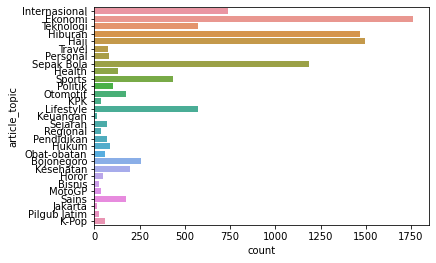

In [4]:
import seaborn as sns

print(df['article_topic'].value_counts())
sns.countplot(y='article_topic', data=df)

In [5]:
df.isnull().sum()

article_id          0
article_topic       0
article_content    36
dtype: int64

Terdapat 29 topic, jumlah artikel pada masing-masing topik berbeda dan memiliki proporsi yang tidak seimbang (imbalance). Dan terdapat 36 articel_content yang berisi Null, kita akan menghilangkan row dengan Null value tersebut.

In [6]:
df.dropna(inplace=True, axis=0)

In [7]:
# WORD-COUNT
df['word_count'] = df['article_content'].apply(lambda x: len(str(x).split()))
print('mean jumlah kata:',df['word_count'].mean())
print('std jumlah kata:',df['word_count'].std())
print('max jumlah kata:',df['word_count'].max())

mean jumlah kata: 353.1245483741469
std jumlah kata: 297.02497882217034
max jumlah kata: 9921


In [8]:
df['word_count'].describe()

count    9964.000000
mean      353.124548
std       297.024979
min         0.000000
25%       233.000000
50%       303.000000
75%       400.000000
max      9921.000000
Name: word_count, dtype: float64

<AxesSubplot:xlabel='word_count', ylabel='Count'>

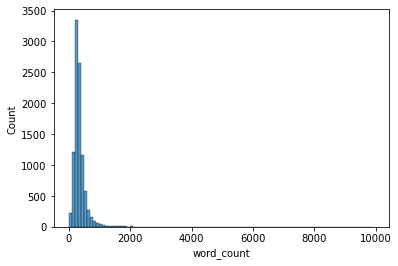

In [9]:
# PLOTTING WORD-COUNT
sns.histplot(x='word_count', data=df, bins=100)

Jumlah kata dalam artikel sangat beragam, bahkan ada artikel jumlah kata 0 atau hanya berisi blank space. Oleh karena itu harus kita hilangkan. Kita akan menggunakan median yaitu 303 jumlah kata.

In [10]:
df = df.loc[df['word_count']>=200]

In [11]:
# df = df.loc[df['word_count']<=1000]

<AxesSubplot:xlabel='word_count', ylabel='Count'>

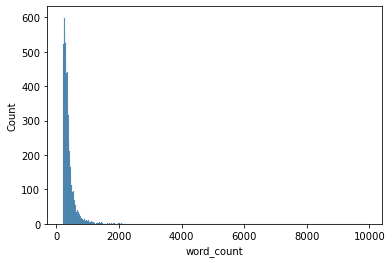

In [12]:
sns.histplot(x='word_count', data=df)

In [13]:
print(len(df))

8509


In [14]:
len(df['article_topic'].unique())

29

Ekonomi          1506
Hiburan          1336
Haji             1257
Sepak Bola       1143
Internasional     585
Lifestyle         549
Teknologi         506
Sports            413
Kesehatan         169
Otomotif          149
Health            117
Bojonegoro        114
Politik            83
Personal           69
Sejarah            66
Hukum              65
Pendidikan         57
Obat-obatan        56
Travel             53
Horor              46
MotoGP             34
Regional           29
KPK                25
Pilgub Jatim       23
Bisnis             21
Keuangan           12
Jakarta            11
Sains               8
K-Pop               7
Name: article_topic, dtype: int64


<AxesSubplot:xlabel='count', ylabel='article_topic'>

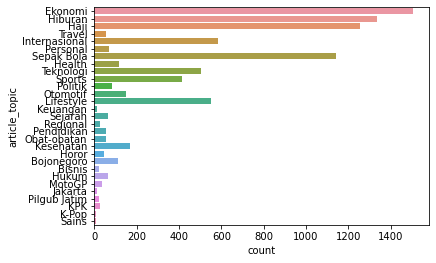

In [15]:
print(df['article_topic'].value_counts())
sns.countplot(y='article_topic', data=df)

setelah kita kita hilangkan artikel dengan jumlah kata kurang dari 303, jumlah data yang ada tinggal 4989 row dari 10000. dengan jumlah di masing-masing topik masih tidak berimbang

### Text Pre-Processing

Pada proses ini setiap kata pada articel_content akan di buat lowercase dan dihilangkan karakter-karakter yang tidak diperlukan seperti tanda baca, karakter khusus, URL & tagar, spasi/tab di awal dan di akhir atau yang berlebihan

In [16]:
#convert to lowercase, strip and remove punctuations
import re, string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

def preprocess(text):
    text = text.lower() #lowering text
    text = text.strip() # remove white space
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text) #string punctuations : ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’
    text = re.sub(r'\d+',' ',text) #remove number
    return text

def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('indonesian')]
    return ' '.join(a)

def finalpreprocess(string):
    return stopword(preprocess(string))


[nltk_data] Downloading package punkt to C:\Users\wildan aulia
[nltk_data]     h\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\wildan aulia
[nltk_data]     h\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df['lower_text'] = df['article_content'].apply(lambda x: preprocess(x))
# df['clean_text'] = df['lower_text'].apply(lambda x: stopword(x))
df.head()

<ipython-input-17-7f1f55dd9f68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lower_text'] = df['article_content'].apply(lambda x: preprocess(x))


,article_id,article_topic,article_content,word_count,lower_text
1,93186698,Ekonomi,Seluruh layanan transaksi di jalan tol akan m...,373,seluruh layanan transaksi di jalan tol akan mu...
3,93219292,Ekonomi,Saat ini Indonesia hanya memiliki cadangan ba...,352,saat ini indonesia hanya memiliki cadangan bah...
4,343106,Hiburan,"Hari ini, Selasa (1/8), pedangdut Ridho Rhoma...",281,hari ini selasa pedangdut ridho rhoma ...
5,93196239,Haji,MEKKAH (MCH) - Walaupun diimbau agar tidak me...,338,mekkah mch walaupun diimbau agar tidak mel...
6,93207180,Travel,Api Biru atau Blue Fire menjadi daya tarik ut...,567,api biru atau blue fire menjadi daya tarik uta...


In [18]:
df

,article_id,article_topic,article_content,word_count,lower_text
1,93186698,Ekonomi,Seluruh layanan transaksi di jalan tol akan m...,373,seluruh layanan transaksi di jalan tol akan mu...
3,93219292,Ekonomi,Saat ini Indonesia hanya memiliki cadangan ba...,352,saat ini indonesia hanya memiliki cadangan bah...
4,343106,Hiburan,"Hari ini, Selasa (1/8), pedangdut Ridho Rhoma...",281,hari ini selasa pedangdut ridho rhoma ...
5,93196239,Haji,MEKKAH (MCH) - Walaupun diimbau agar tidak me...,338,mekkah mch walaupun diimbau agar tidak mel...
6,93207180,Travel,Api Biru atau Blue Fire menjadi daya tarik ut...,567,api biru atau blue fire menjadi daya tarik uta...
...,...,...,...,...,...
9994,173127,Politik,Presiden Joko Widodo ingin pengelolaan tabung...,246,presiden joko widodo ingin pengelolaan tabunga...
9996,93203115,Ekonomi,"Pada akhir tahun ini, Direktur Jenderal (Dirj...",327,pada akhir tahun ini direktur jenderal dirje...
9997,93230854,Sepak Bola,Ketika pertama kali datang ke Barcelona pada ...,373,ketika pertama kali datang ke barcelona pada ...
9998,93199312,Sepak Bola,Tim Nasional (Timnas) Indonesia U-19 berhasil...,325,tim nasional timnas indonesia u berhasil m...


### Feature Extraction

Untuk melakukan modeling daata yang berupa text harus diubah dalam bentuk vector, salah satu metode untuk mengubah text ke vector yaitu menggunakan Term Frequency - Inverse Documents Frequency

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vect = TfidfVectorizer(max_df=0.8, min_df=0.001,use_idf=True)

In [21]:
tfidf = vect.fit_transform(df['lower_text'])

In [22]:
X_train = tfidf
y_train = df['article_topic'].values

### Modeling dan evaluation

Untuk modeling akan dilakukan dengan beberapa metode modeling dan akan dipilih satu dengan nilai evaluasi yang paling tinggi. Evaluasi dilakukan menggunakan Stratified Cross validation dengan split sebanyak 10 dan menggunakan metrics F1-Score. Metric F1-Score dipilih karena data yang digunakan dalam pelatihan memiliki proporsi kelas yang imbalance sehingga diharapkan dapat merepresentasikan performa model yang sebenarnya. Untuk Model yang akan digunakan yaitu Logistic Regression, Naive Bayes, dan Support Vector Machine. Ketiga model ini adalah model yang sering digunakan untuk klasifikasi data berupa text. Model Logistic Regression digunakan sebagai baseline

In [23]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [24]:
def scorer(model, X, y, n_splits=10):
    cv = StratifiedKFold(n_splits=n_splits, random_state=seed,shuffle=True)
    cv_score = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_micro")
    return np.mean(cv_score)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression(random_state=seed)

In [27]:
score = scorer(model, X_train, y_train)

C:\Users\wildan aulia h\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\wildan aulia h\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wildan aulia h\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations 

In [28]:
score

0.8567394760489391

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
nb = MultinomialNB(alpha=0.01)
nb_score = scorer(nb, X_train, y_train)

C:\Users\wildan aulia h\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [31]:
nb_score

0.8847097532314925

In [32]:
from sklearn.svm import LinearSVC

In [33]:
lsvc = LinearSVC(random_state=seed, C=2)
lsvc_score = scorer(lsvc, X_train, y_train)

C:\Users\wildan aulia h\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [34]:
lsvc_score

0.8969312227828852

Didapatkan hasil bahwa pada pengujian di atas, model SVM memiliki performa terbaik dengan nilai F1-Score sebesar 0.8969

### Future Works
1. Mencoba algoritma machine learning yang lain (contoh: XgBoost, Ensemble models) dan deep learning (contoh : CNN, LSTM)
2. Handle imbalance data dengan Resampling 
3. Praproses data untuk yang saya gunakan saat ini hanya mengubah kata-kata menjadi lower, dapat ditingkatkan untuk menggunakan stopwords removal dan Stemming
4. Ubah representasi text (vector space model) sebagai contoh : Word2Vec, Glove, dll
5. Tuning hyperparameter pada vectorizer dan model machine learning